In [1]:
# packages for function
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
# load the classification model
model = load_model('skin_cancer_classifier.h5') 

The function below takes a path to the image of interest and outputs what the image looks like and the predicted class with a probability.

In [3]:
def skin_cancer_classifier(path):
    img = cv2.imread(path)
    plt.imshow(img[...,::-1])
    plt.show()
    pred = float(model.predict(np.expand_dims(tf.image.resize(img, (256,256))/255, 0)))
    if pred > 0.5: 
        print('Predicted class is cancerous.')
    else:
        print('Predicted class is not cancerous.')
    print(f'Probability of skin cancer: {pred}')

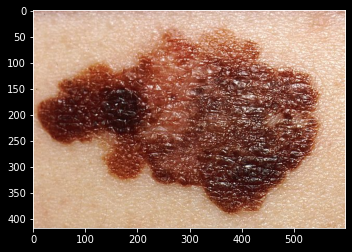

1/1 [==============================] - 0s 40ms/step
Predicted class is cancerous.
Probability of skin cancer: 0.9999997615814209


In [5]:
# example image of malignant tumor
skin_cancer_classifier('test_img.jpg')

The model doesn't do a bad job overall, but for people with darker skin tones it doesn't perform well. This is an example of bias in AI since the images used for building the model come almost exclusively from people with light skin. The model's prediction power is poor for people with darker skin.

The below image is a benign tumor (harmless) but the model predicts with high confidence that it is malignant.

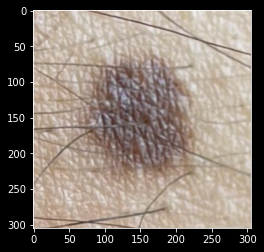

1/1 [==============================] - 0s 48ms/step
Predicted class is cancerous.
Probability of skin cancer: 0.9760197997093201


In [7]:
skin_cancer_classifier('test_img2.jpg')